# Text Classification Project

______________________
#### Part of Coding Ninjas ML Course

In this project, a text classifier will be trained to classify news into 20 categories using 20000 data points. Model will be based on multinomial Naive Bayes Algorithm.

In [85]:
import os
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,f1_score,classification_report
import matplotlib.pyplot as plt

In [86]:
all_folders=os.listdir("Datasets/20_newsgroups/")

Iterating over txt files to store news data in a list.

In [87]:
news=[]
topics=[] 

for i in all_folders:
    all_files=os.listdir(f"Datasets/20_newsgroups/{i}")
    for x in all_files:
        with open(f"Datasets/20_newsgroups/{i}/{x}",'r') as file:
            data=file.read()
            news.append(data[data.find('\n\n'):])
            topics.append(i)


In [88]:
 news[0].find('\n\n')

0

In [89]:
news[0][news[0].find('\n\n'):]

'\n\nArchive-name: atheism/resources\nAlt-atheism-archive-name: resources\nLast-modified: 11 December 1992\nVersion: 1.0\n\n                              Atheist Resources\n\n                      Addresses of Atheist Organizations\n\n                                     USA\n\nFREEDOM FROM RELIGION FOUNDATION\n\nDarwin fish bumper stickers and assorted other atheist paraphernalia are\navailable from the Freedom From Religion Foundation in the US.\n\nWrite to:  FFRF, P.O. Box 750, Madison, WI 53701.\nTelephone: (608) 256-8900\n\nEVOLUTION DESIGNS\n\nEvolution Designs sell the "Darwin fish".  It\'s a fish symbol, like the ones\nChristians stick on their cars, but with feet and the word "Darwin" written\ninside.  The deluxe moulded 3D plastic fish is $4.95 postpaid in the US.\n\nWrite to:  Evolution Designs, 7119 Laurel Canyon #4, North Hollywood,\n           CA 91605.\n\nPeople in the San Francisco Bay area can get Darwin Fish from Lynn Gold --\ntry mailing <figmo@netcom.com>.  For net 

In [90]:
len(news)

19997

Saving all news articles in a dataframe

In [91]:
news_data=pd.DataFrame(news,columns=['news'])

In [92]:
news_data['topic']=topics

In [93]:
len(topics)

19997

In [94]:
news_data.head(1)

,news,topic
0,\n\nArchive-name: atheism/resources\nAlt-athei...,alt.atheism


In [95]:
# Splitting data into training and test set

x_train,x_test,y_train,y_test=train_test_split(news_data['news'],news_data['topic'],test_size=0.2)

In [96]:
# Converting text data into a Count Vector

cv=CountVectorizer()

x_train_vector=cv.fit_transform(x_train)

In [97]:
# Fitting the Model

reg=MultinomialNB()

reg.fit(x_train_vector,y_train)

MultinomialNB()

In [98]:

reg.score(x_train_vector,y_train)

0.8689129211727199

In [99]:
# Predicting for test set.

x_test_vector=cv.transform(x_test)

preds=reg.predict(x_test_vector)

<Figure size 2200x1600 with 0 Axes>

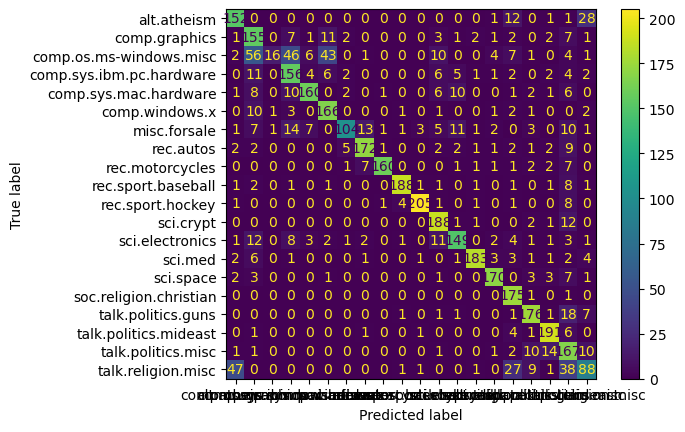

In [100]:
# Visualizing the predicted outputs.

plt.figure(figsize=(22,16))
ConfusionMatrixDisplay.from_predictions(y_test,preds)


In [101]:

print(classification_report(y_test,preds))

                          precision    recall  f1-score   support

             alt.atheism       0.71      0.78      0.74       195
           comp.graphics       0.57      0.79      0.66       196
 comp.os.ms-windows.misc       0.89      0.08      0.15       197
comp.sys.ibm.pc.hardware       0.63      0.77      0.70       202
   comp.sys.mac.hardware       0.88      0.77      0.82       208
          comp.windows.x       0.72      0.88      0.79       188
            misc.forsale       0.89      0.56      0.69       185
               rec.autos       0.87      0.85      0.86       202
         rec.motorcycles       0.98      0.87      0.92       183
      rec.sport.baseball       0.95      0.91      0.93       207
        rec.sport.hockey       0.97      0.92      0.94       222
               sci.crypt       0.79      0.92      0.85       205
         sci.electronics       0.82      0.74      0.78       202
                 sci.med       0.95      0.88      0.91       209
         

# Now fitting the model to predict main topic 
alt

comp

misc

rec

sci

soc

talk

In [102]:
main_topics=news_data.topic.str.split('.',expand=True)[0]

In [103]:
news_data['topic_main']=main_topics

In [104]:
x_train,x_test,y_train,y_test=train_test_split(news_data['news'],news_data['topic_main'],test_size=0.2)

In [105]:
cv=CountVectorizer()

x_train_vector=cv.fit_transform(x_train)

In [106]:
reg2=MultinomialNB()

reg2.fit(x_train_vector,y_train)

MultinomialNB()

In [107]:
reg2.score(x_train_vector,y_train)

0.9093580046258674

In [108]:

pred2=reg2.predict(cv.transform(x_test))

In [109]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

         alt       0.67      0.58      0.62       169
        comp       0.91      0.89      0.90       997
        misc       0.94      0.40      0.56       201
         rec       0.95      0.96      0.96       841
         sci       0.82      0.93      0.87       796
         soc       0.97      0.72      0.83       192
        talk       0.81      0.91      0.86       804

    accuracy                           0.87      4000
   macro avg       0.87      0.77      0.80      4000
weighted avg       0.87      0.87      0.86      4000



## For predicting main topic (total 7) : 87% Test Accuracy
__________________________
## For predicting sub point with main topic (total 20) : 78% Test Accuracy